In [36]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# import libraries
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [38]:
# define 2 fnctions: load_data and write_data 
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop_words = stopwords.words("english")

In [41]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [42]:
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#read just a text
#data2 = open("sample2.txt").read().lower()

In [7]:
#data2

In [ ]:
#print (data2)

in latin, and in english until around 1700, the term mathematics more commonly meant astrology (or sometimes astronomy) rather than mathematics. the resulting euclidean geometry is the study of shapes and their arrangements constructed from lines, planes and circles in the euclidean plane (plane geometry) and the (three-dimensional) euclidean space.euclidean geometry was developed without change of methods or scope until the 17th century, when rené descartes introduced what is now called cartesian coordinates. this was a major change of paradigm, since instead of defining real numbers as lengths of line segments (see number line), it allowed the representation of points using their coordinates (which are numbers). this allows one to use algebra (and later, calculus) to solve geometrical problems. this split geometry into two new subfields: synthetic geometry, which uses purely geometrical methods, and analytic geometry, which uses coordinates systemically. analytic geometry allows the 

In [43]:
# load the text part of json file and print the first 90 charaters
data = load_data("sample.txt")["texts"]

print (data[0][0:90])

 In Latin, and in English until around 1700, the term mathematics more commonly meant astr


In [44]:
data

[" In Latin, and in English until around 1700, the term mathematics more commonly meant astrology (or sometimes astronomy) rather than mathematics. The resulting Euclidean geometry is the study of shapes and their arrangements constructed from lines, planes and circles in the Euclidean plane (plane geometry) and the (three-dimensional) Euclidean space.Euclidean geometry was developed without change of methods or scope until the 17th century, when René Descartes introduced what is now called Cartesian coordinates. This was a major change of paradigm, since instead of defining real numbers as lengths of line segments (see number line), it allowed the representation of points using their coordinates (which are numbers). This allows one to use algebra (and later, calculus) to solve geometrical problems. This split geometry into two new subfields: synthetic geometry, which uses purely geometrical methods, and analytic geometry, which uses coordinates systemically. Analytic geometry allows t

In [51]:
#function to filter out stopwords

def remove_stopwords(texts):

    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [56]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

term mathematic more commonly mean astrology sometimes astronomy rather mathematic result 


In [57]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['term', 'mathematic', 'more', 'commonly', 'mean', 'astrology', 'sometimes', 'astronomy', 'rather', 'mathematic', 'result', 'euclidean', 'geometry', 'study', 'shape', 'arrangement', 'construct', 'line', 'plane', 'circle']


In [58]:
data_wo_stopwords = remove_stopwords(data_words)

In [ ]:
data_wo_stopwords

In [60]:
id2word = corpora.Dictionary(data_wo_stopwords)

corpus = []
for text in data_wo_stopwords:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 4), (1, 2), (2, 1), (3, 1), (4, 1), (5, 5), (6, 6), (7, 1), (8, 5), (9, 3), (10, 1), (11, 3), (12, 1), (13, 1), (14, 4), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1)]
abstract


In [61]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [62]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [65]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=20)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
22    -0.047308 -0.032876       1        1  99.897157
7      0.001469  0.000995       2        1   0.003652
5      0.001462  0.001035       3        1   0.003650
9      0.001541  0.001059       4        1   0.003647
10     0.001553  0.001070       5        1   0.003646
28     0.001563  0.001082       6        1   0.003644
13     0.001564  0.001085       7        1   0.003644
8      0.001580  0.001091       8        1   0.003643
14     0.001594  0.001103       9        1   0.003641
29     0.001594  0.001103      10        1   0.003640
23     0.001599  0.001113      11        1   0.003640
15     0.001620  0.001129      12        1   0.003636
18     0.001627  0.001130      13        1   0.003635
1      0.001621  0.001123      14        1   0.003635
4      0.001624  0.001131      15        1   0.003634
19     0.001633  0.001138      16        1   0.003634
20     0.001664  0.001161      17        1   0.003624
11     0.001668  0.001161      18        1   0.003623
24     0.001672  0.001160      19        1   0.003623
27     0.001679  0.001165      20        1   0.003619
26     0.001684  0.001172      21        1   0.003615
21     0.001683  0.001174      22        1   0.003614
6      0.001683  0.001176      23        1   0.003614
2      0.001686  0.001175      24        1   0.003614
0      0.001685  0.001177      25        1   0.003613
3      0.001690  0.001180      26        1   0.003611
16     0.001711  0.001190      27        1   0.003591
25     0.001721  0.001198      28        1   0.003499
17     0.001720  0.001199      29        1   0.002482
12     0.001719  0.001200      30        1   0.002482, topic_info=              Term       Freq      Total Category  logprob  loglift
128       geometry  21.000000  21.000000  Default  20.0000  20.0000
182     mathematic  19.000000  19.000000  Default  19.0000  19.0000
98        equation  10.000000  10.000000  Default  18.0000  18.0000
184  mathematician   8.000000   8.000000  Default  17.0000  17.0000
314          study   8.000000   8.000000  Default  16.0000  16.0000
..             ...        ...        ...      ...      ...      ...
14     application   0.000045   3.958943  Topic30  -5.8749  -0.7786
16           apply   0.000045   1.015843  Topic30  -5.8749   0.5817
17          arabic   0.000045   1.015653  Topic30  -5.8749   0.5819
18            area   0.000045   2.977381  Topic30  -5.8749  -0.4936
19           argue   0.000045   1.015597  Topic30  -5.8749   0.5819

[1329 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  1.009988     abstract
1         1  1.002033  abstraction
2         1  0.984517          act
3         1  0.984241      address
4         1  0.984972        adopt
...     ...       ...          ...
349       1  0.984586        valid
351       1  0.984330      various
352       1  0.984715         view
353       1  0.984505         wave
355       1  0.984604         word

[254 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 8, 6, 10, 11, 29, 14, 9, 15, 30, 24, 16, 19, 2, 5, 20, 21, 12, 25, 28, 27, 22, 7, 3, 1, 4, 17, 26, 18, 13])

In [ ]:
# 3D function animation - possible to dirichlet

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

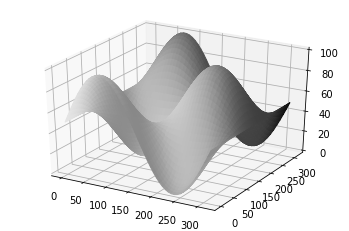

In [ ]:

from math import pi, cos, sin
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x_ = np.linspace(0, 314, 50)
y_ = np.linspace(0, 314, 50)
X, Y = np.meshgrid(x_, y_)

t_ = np.linspace(0, 2*pi, 90)

def f(x, y):
  return np.sin(x/50) * np.cos(y/50) * 50 + 50

def g(x, y, t):
  return f(x*cos(t) - y*sin(t), x*sin(t) + y*cos(t))

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

def animate(n):
    ax.cla()
    Z = g(X, Y, t_[n])
    colorfunction = (X**2+Y**2+Z**2)
    norm = mcolors.Normalize(colorfunction.min(), colorfunction.max())
    ax.plot_surface(
      X, Y, Z, rstride = 1, cstride = 1, facecolors=cm.Greys(norm(colorfunction))
    )
    ax.set_zlim(0, 100)
    return fig
                
anim = FuncAnimation(
  fig = fig, func = animate, frames = len(t_), interval = 1, repeat = False
)
# save animation at 20 frames per second 
anim.save("sincos.gif", dpi=150, writer=PillowWriter(fps=10))

# save animation to mp4 
# anim.save("Anim.mp4", fps = 10)
